# A* search with tree search

In contrast to the conventional A* with graph search, A* with tree search does not consider the existence of a Closed set and already visited nodes are re-opened as they were unexplored nodes.

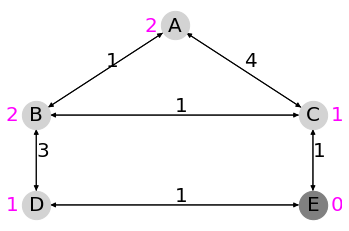

In [3]:
import matplotlib.pyplot as plt
import networkx as nx
import pydot
# G is a graph represented as an adjancency list. 
# G is a hash table (dictionary) with each node as a key, and value, the list of adjacent nodes
G={'A':['B','C'],'B':['A','C','D'],'C':['A','B','E'],'D':['B','E'],'E':['C','D']}
W={('A','B'): 1, ('B','A'): 1, ('A', 'C'): 4, ('C','A'): 4, ('B','C'): 1, ('C','B'): 1, ('C','E'): 1, ('E','C'): 1, ('B','D'): 3, ('D','B'): 3, ('D','E'): 1, ('E','D'): 1}
h={"A": 2, "B": 2, "C": 1, "D": 1, "E": 0}
lab_h = {}
for i in h: lab_h[i] = str(h[i])
nxG=nx.DiGraph(G)
nx.set_edge_attributes(nxG, values = W, name = 'weight')
source='A'
Target=['E']
pos_nodes = {'A': (20, 300), 'B': (10, 200), 'C': (30, 200), 'D': (10, 100), 'E': (30, 100)}
pos_h = {'A': (18.25, 300), 'B': (8.25, 200), 'C': (31.75, 200), 'D': (8.25, 100), 'E': (31.75, 100)}
nx.draw_networkx_edge_labels(nxG, pos=pos_nodes,edge_labels=W,font_size=20,
  horizontalalignment="left",verticalalignment="bottom",rotate=False, label_pos=0.5)
nx.draw_networkx_labels(nxG, pos_h, labels=lab_h, font_size=20, font_color="magenta")
nx.draw(nxG,pos=pos_nodes, with_labels=True, node_color="lightgray", node_size=800, font_size=20)
nx.draw_networkx_nodes(nxG,pos=pos_nodes, nodelist=Target, node_color='gray', node_size=800)

### A* with graph search implementation graphically showing the sequence of nodes visited

E


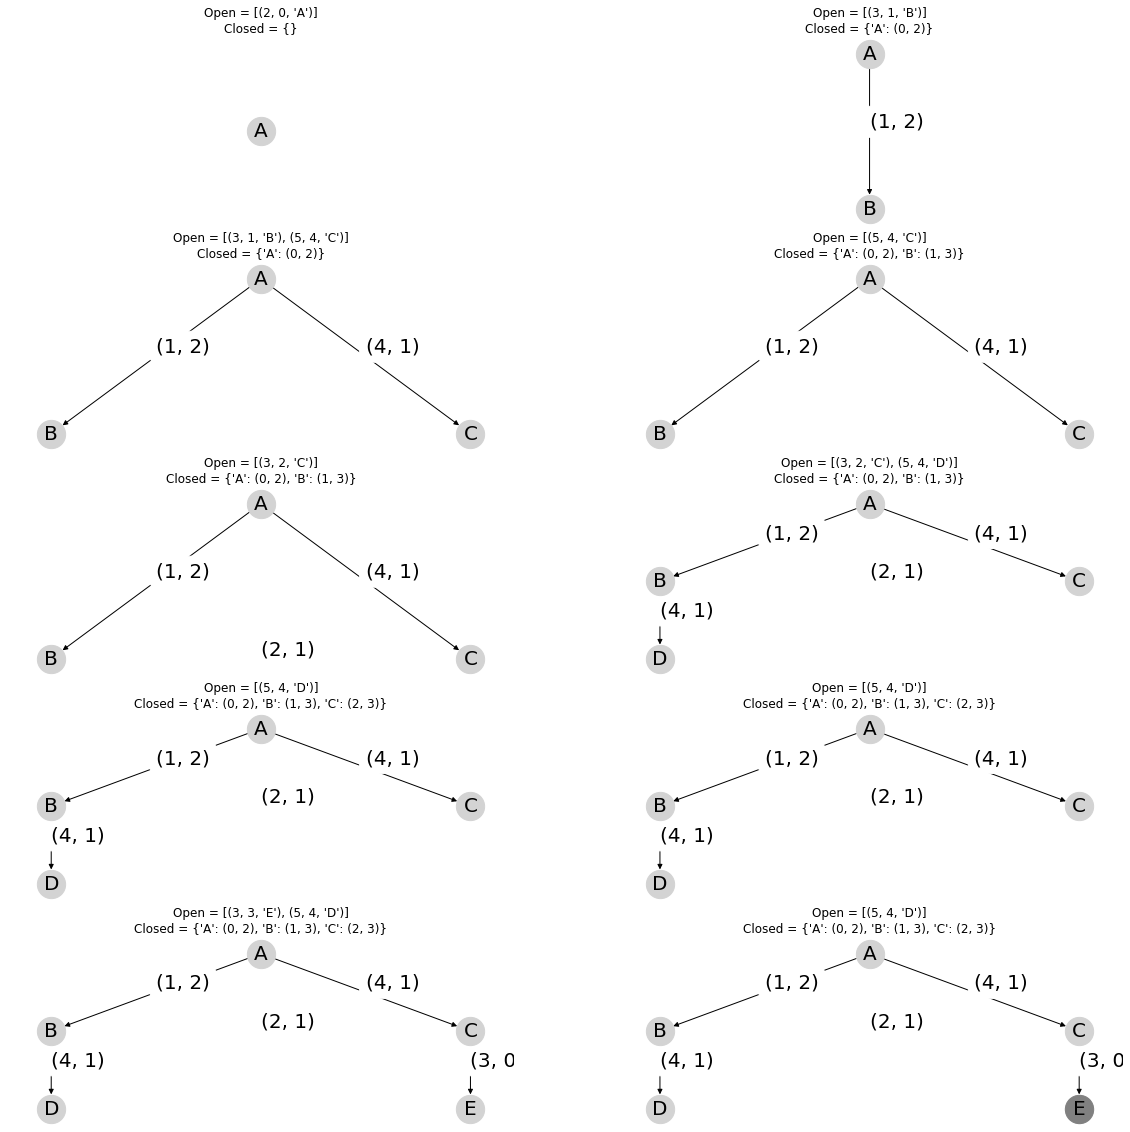

In [10]:
import matplotlib.pyplot as plt

nrows=5; ncols=2
fig, _ = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 20))
axes = iter(fig.axes)

def draw_graph(DG, DW, source, Open, Closed, target=[]):
  nxDG=nx.DiGraph(DG)
  ax = next(axes)
  ax.set_title("Open = "+str(Open)+"\n"+"Closed = "+str(Closed))
  pos_nodes = nx.nx_agraph.pygraphviz_layout(nxDG, prog='dot', root=source)
  nx.draw(nxDG, pos=pos_nodes, ax=ax, with_labels=True, node_color="lightgray", node_size=800, font_size=20)
  nx.draw_networkx_edge_labels(nxDG, pos=pos_nodes, edge_labels=DW, label_pos=0.5, font_size=20, 
    horizontalalignment="left",verticalalignment="bottom", ax=ax, rotate=False)
  nx.draw_networkx_nodes(nxDG, pos=pos_nodes, nodelist=target, node_color='gray', node_size=800)

import heapq
# G is a graph represented as an adjancency list
# W is a dictionary that for each pair of nodes as a tuple returns their cost
# source is the label (string) of the source node
# target is the list of target nodes
def astar(G, W, source, Target, h):
  gn = 0
  fn = gn + h[source]
  Openh = []; heapq.heappush(Openh,(fn,gn,source)); 
  Opend = {}; Opend[source] = (gn,fn)
  Closed = {}
  DG = {source:[]}
  DW = {}
  draw_graph(DG, DW, source, Openh, Closed)
  while Openh != []:
    (fs,gs,s) = heapq.heappop(Openh); del Opend[s]
    if s in Target:
      draw_graph(DG, DW, source, Openh, Closed, [s])
      return s
    Closed[s] = (gs,fs)
    Adj = DG[s]
    for n in G[s]:
      gn = gs + W[(s,n)]
      fn = gn + h[n]
      if n not in Closed:
        if n not in Opend:
          heapq.heappush(Openh,(fn,gn,n)); Opend.update({n: (gn,fn)})
          Adj.append(n); DG[s]=Adj; DG.update({n:[]}); DW.update({(s,n):(gn,fn-gn)})
        else:
          (ogn,ofn) = Opend[n]
          # Existing node with better fn -> update
          if fn < ofn:
            i = Openh.index((ofn,ogn,n))
            Openh[i] = (fn,gn,n)
            heapq._siftdown(Openh,0,i)
            DW.update({(s,n):(gn,fn-gn)})
      else:
        (ogn,ofn) = Closed[n]
        # Existing node with better fn -> update
        if fn < ofn:
          del Closed[n]
          heapq.heappush(Openh,(fn,gn,n)); Opend.update({n: (gn,fn)})
      draw_graph(DG, DW, source, Openh, Closed)
          
print(astar(G,W,source,Target,h))